# Code to download different datasets, clean up directory and create filenames

In [22]:
# Loading label file

label_file = 'labels.txt'
with open(label_file, "r") as f:
    labels = [x.rstrip('\n') for x in f.readlines()]

In [23]:
# Additional labels to produce

import os
import csv

ranking_file = 'data/ingredient_list.csv'

labels_ranking = list()

with open(ranking_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        labels_ranking += [row[1]]
        
labels_ranking = list(set(labels_ranking))

In [24]:
# Checking difference in labels vs already existing ones

queries = list()

for i in labels_ranking:
    if i not in labels or labels.replace('_', ' ') in i:
        queries += [i.title().replace(' ', '_')]

queries = list(set(queries))
print('Number of new ingredients:', len(queries))

Number of new ingredients: 8024


In [25]:
# Reading or writing out additional label file
with open('additional_ingredients.txt', "r") as f:
    labels = [x.rstrip('\n') for x in f.readlines()]

In [26]:
labels

['Goji_Berry',
 'Blue_Cheese',
 'Clam',
 'Steak',
 'Tofu',
 'Tuna_Steak',
 'Shrimp',
 'Pork',
 'Artichoke_Hearts',
 'Green_Cabbage',
 'Lettuce',
 'Brie_Cheese',
 'Pumpkin',
 'Heavy_Cream',
 'Kale',
 'Coconut_Milk',
 'Jackfruit',
 'Artichoke',
 'Tahini',
 'Black_Coffee',
 'Pesto_Sauce',
 'Olives',
 'Garlic',
 'Flax_Seed',
 'Bulgur']

In [45]:
# Scrapping from Google images

from google_images_download import google_images_download 

# creating object and feeding search queries
response = google_images_download.googleimagesdownload() 

search_queries = ['eggs']

def downloadimages(query , number): 
    arguments = {"keywords": query, 
                 "format": "jpg", 
                 "limit": number, 
                 "print_urls":True, 
                 "size": "medium"} 
    
    try: 
        response.download(arguments) 

    except FileNotFoundError:  
            pass

# Execution
number = 100 #images per query

for query in search_queries: 
    downloadimages(query, number) 
    print() 


Item no.: 1 --> Item name = eggs
Evaluating...
Starting Download...


Unfortunately all 100 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0




In [18]:
# Scrapping from other sources
# Source for code: https://dev.to/petercour/image-scraping-with-python-330a

import re
import requests
from urllib.parse import urlparse
import os


def download_baidu(keyword, number): 
    url = 'https://image.baidu.com/search/flip?tn=baiduimage&ie=utf-8&word='+word+'&ct=201326592&v=flip'
    result = requests.get(url)
    html = result.text
    pic_url = re.findall('"objURL":"(.*?)",',html,re.S)
    i = 0

    for each in pic_url:
        print(pic_url)
        try:
            pic= requests.get(each, timeout=10)
        except (requests.exceptions.ConnectionError, requests.exceptions.Timeout, requests.exceptions.TooManyRedirects) as e:
            print ('exception', e)
            continue

        string = 'pictures'+keyword+'_'+str(i) + '.jpg'
        fp = open('downloads\\' + word + '\\' + string,'wb')
        fp.write(pic.content)
        fp.close()
        i += 1
        
        if i > number:
            break
            
for word in labels:
    download_baidu(word, 100)


In [ ]:
# Downloading grocery dataset
# http://ais.informatik.uni-freiburg.de/publications/papers/jund16groceries.pdf
# https://github.com/PhilJd/freiburg_groceries_dataset

from subprocess import call
import os
import urllib.request

dataset_url = "http://aisdatasets.informatik.uni-freiburg.de/" \
              "freiburg_groceries_dataset/freiburg_groceries_dataset.tar.gz"

print("Downloading dataset.")
urllib.request.urlretrieve(dataset_url, "/home/miber/data/freiburg_groceries_dataset.tar.gz")
print("Extracting dataset.")
call(["tar", "-xf", "/home/miber/data/freiburg_groceries_dataset.tar.gz", "-C", "/home/miber/data/"])
os.remove("/home/miber/data/freiburg_groceries_dataset.tar.gz")
print("Done.")

In [ ]:
# Grocery image dataset
# https://github.com/gulvarol/grocerydataset

# NOT USEFUL, CONTAINS CIGARETTES ONLY!!!!

# Part 1

dataset_url = "https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part1.tar.gz"

print("Downloading dataset.")
urllib.request.urlretrieve(dataset_url, "/home/miber/data/GroceryDataset_part1.tar.gz")
print("Extracting dataset.")
call(["tar", "-xf", "/home/miber/data/GroceryDataset_part1.tar.gz", "-C", "/home/miber/data/"])
os.remove("/home/miber/data/GroceryDataset_part1.tar.gz")
print("Done.")

# Part 2

dataset_url = "https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part2.tar.gz"

print("Downloading dataset.")
urllib.request.urlretrieve(dataset_url, "/home/miber/data/GroceryDataset_part2.tar.gz")
print("Extracting dataset.")
call(["tar", "-xf", "/home/miber/data/GroceryDataset_part2.tar.gz", "-C", "/home/miber/data/"])
os.remove("/home/miber/data/GroceryDataset_part2.tar.gz")
print("Done.")

In [4]:
# Cleaning up directory
import os
label_file = 'labels.txt'
base_dir = '/home/miber/' # for data and output files
train_dir = os.path.join(base_dir, 'data/ingredients-images/ingredients-train')
test_dir = os.path.join(base_dir, 'data/ingredients-images/ingredients-test')
output_dir = 'ingredients_training_output_files'

In [5]:
# Check that no test directory is empty
dirName = train_dir
listOfEmptyDirs = [dirpath for (dirpath, dirnames, filenames) in os.walk(dirName) if len(dirnames) == 0 and len(filenames) == 0]
listOfEmptyDirs

['/home/miber/data/ingredients-images/ingredients-train/Flax_Seed/.ipynb_checkpoints']

In [6]:
#If not empty, clean the folders up!
for file in listOfEmptyDirs:
    !rm -r {file}

In [7]:
!rm -r /home/miber/data/ingredients-images/ingredients-train/.ipynb_checkpoints

rm: cannot remove '/home/miber/data/ingredients-images/ingredients-train/.ipynb_checkpoints': No such file or directory


In [8]:
# write label file
labels = os.listdir(train_dir)

with open(label_file, "w") as f:
    for label in labels:
        f.writelines(label + '\n')

print(labels)
print(len(labels))

['Walnut', 'Steak', 'Orange', 'Clam', 'Honey', 'Romanesco', 'Pomelo', 'Dates', 'Mulberry', 'Cantaloupe', 'Pitahaya', 'Mushroom', 'Cocos', 'Rice', 'Eggplant', 'Pesto_Sauce', 'Pasta', 'Bok_Choi', 'Tomato', 'Quince', 'Flax_Seed', 'Pineapple', 'Grapefruit', 'Vinegar', 'Yoghurt', 'Heavy_Cream', 'Plum', 'Green_Cabbage', 'Asparagus', 'Hazelnut', 'Cucumber', 'Kale', 'Pomegranate', 'Rambutan', 'Cactus_Fruit', 'Maracuja', 'Nut_Pecan', 'Lemon', 'Tuna_Steak', 'Apple', 'Granadilla', 'Peach', 'Mangostan', 'Flour', 'Tomato_Sauce', 'Lettuce', 'Guava', 'Beans', 'Mandarin_Orange', 'Strawberry', 'Leek', 'Passion_Fruit', 'Kiwi', 'Oat_Milk', 'Pumpkin', 'Watermelon', 'Banana_Red', 'Sugar', 'Physalis', 'Bulgur', 'Corn', 'Kohlrabi', 'Artichoke', 'Goji_Berry', 'Coconut_Milk', 'Apricot', 'Cherry', 'Cabbage', 'Blueberries', 'Kumquats', 'Tahini', 'Cauliflower', 'Garlic', 'Huckleberry', 'Pork', 'Tamarillo', 'Lime', 'Grape', 'Oil', 'Ginger_Root', 'Melon_Piel_de_Sapo', 'Onion_Red', 'Jackfruit', 'Lychee', 'Shrimp', '

In [9]:
content = dict()

for label in os.listdir(train_dir):
    content[label] = 0

for root, dirs, files in os.walk(train_dir):
    if files:
        content[root.split('/', 6)[6]] = len(files)

In [10]:
sorted_labels_freq = sorted(content.items(), key=lambda item: -item[1])
sorted_labels_freq

[('Cherry', 7110),
 ('Tomato', 4312),
 ('Grape', 2371),
 ('Pear', 2057),
 ('Plum', 1892),
 ('Bell_Pepper', 1637),
 ('Apple', 1589),
 ('Potato', 1551),
 ('Strawberry', 1243),
 ('Cantaloupe', 1140),
 ('Nectarine', 1123),
 ('Lemon', 1088),
 ('Avocado', 1069),
 ('Grapefruit', 1056),
 ('Mango', 1003),
 ('Onion_Red', 987),
 ('Melon_Piel_de_Sapo', 840),
 ('Walnut', 746),
 ('Cauliflower', 738),
 ('Nut_Forest', 663),
 ('Kiwi', 622),
 ('Pomegranate', 613),
 ('Lime', 611),
 ('Nut_Pecan', 600),
 ('Papaya', 586),
 ('Tamarillo', 583),
 ('Rambutan', 582),
 ('Dates', 578),
 ('Orange', 578),
 ('Granadilla', 575),
 ('Kumquats', 574),
 ('Mulberry', 571),
 ('Salak', 571),
 ('Guava', 566),
 ('Passion_Fruit', 566),
 ('Kohlrabi', 564),
 ('Pepino', 564),
 ('Pitahaya', 564),
 ('Cactus_Fruit', 563),
 ('Redcurrant', 561),
 ('Huckleberry', 555),
 ('Eggplant', 545),
 ('Apricot', 544),
 ('Quince', 542),
 ('Kaki', 539),
 ('Blueberries', 529),
 ('Pomelo', 524),
 ('Onion_White', 522),
 ('Raspberry', 521),
 ('Mandarin_

In [11]:
import numpy as np
label, number = zip(*sorted_labels_freq)
frequency = number / np.sum(number)
indices = np.arange(len(sorted_labels_freq))

print('Total number of files:', np.sum(number))

Total number of files: 63274


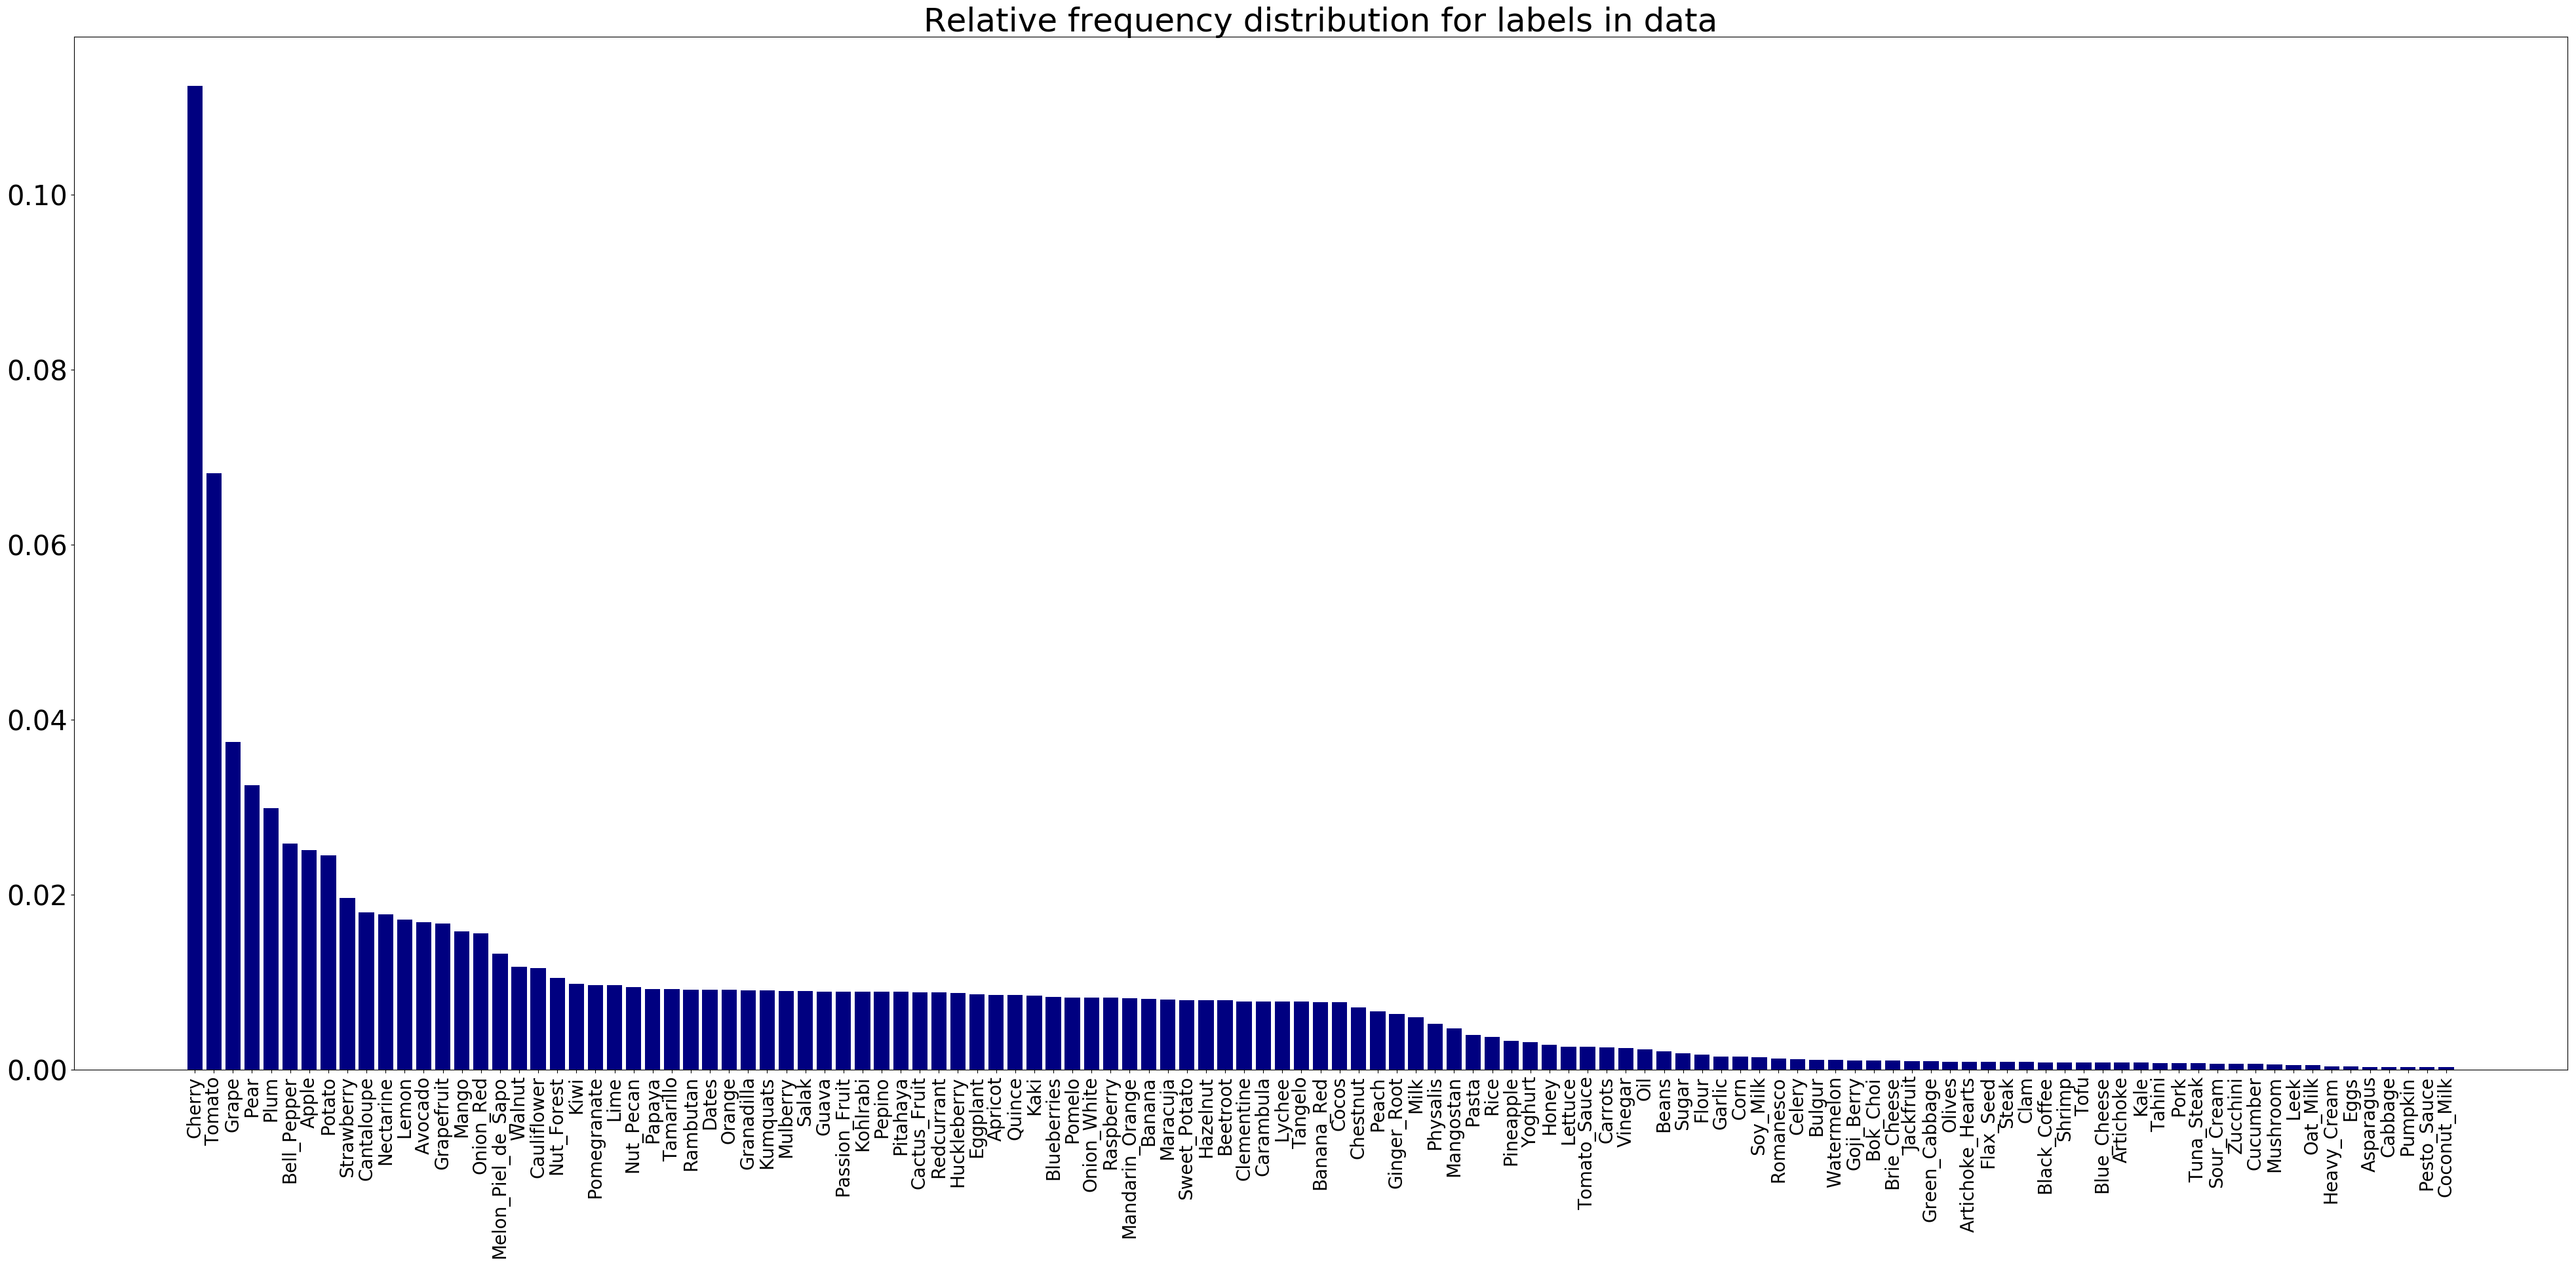

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams.update({'font.size': 30})
plt.figure(num=None, figsize=(40, 20), dpi=100, facecolor='w', edgecolor='k')
plt.bar(indices, frequency, color='navy')
plt.xticks(indices, label, fontsize=20, rotation='vertical')
plt.title('Relative frequency distribution for labels in data')
plt.tight_layout()
plt.show()

fig = plt.gcf()
fig.savefig('label_freq.png', dpi=100)

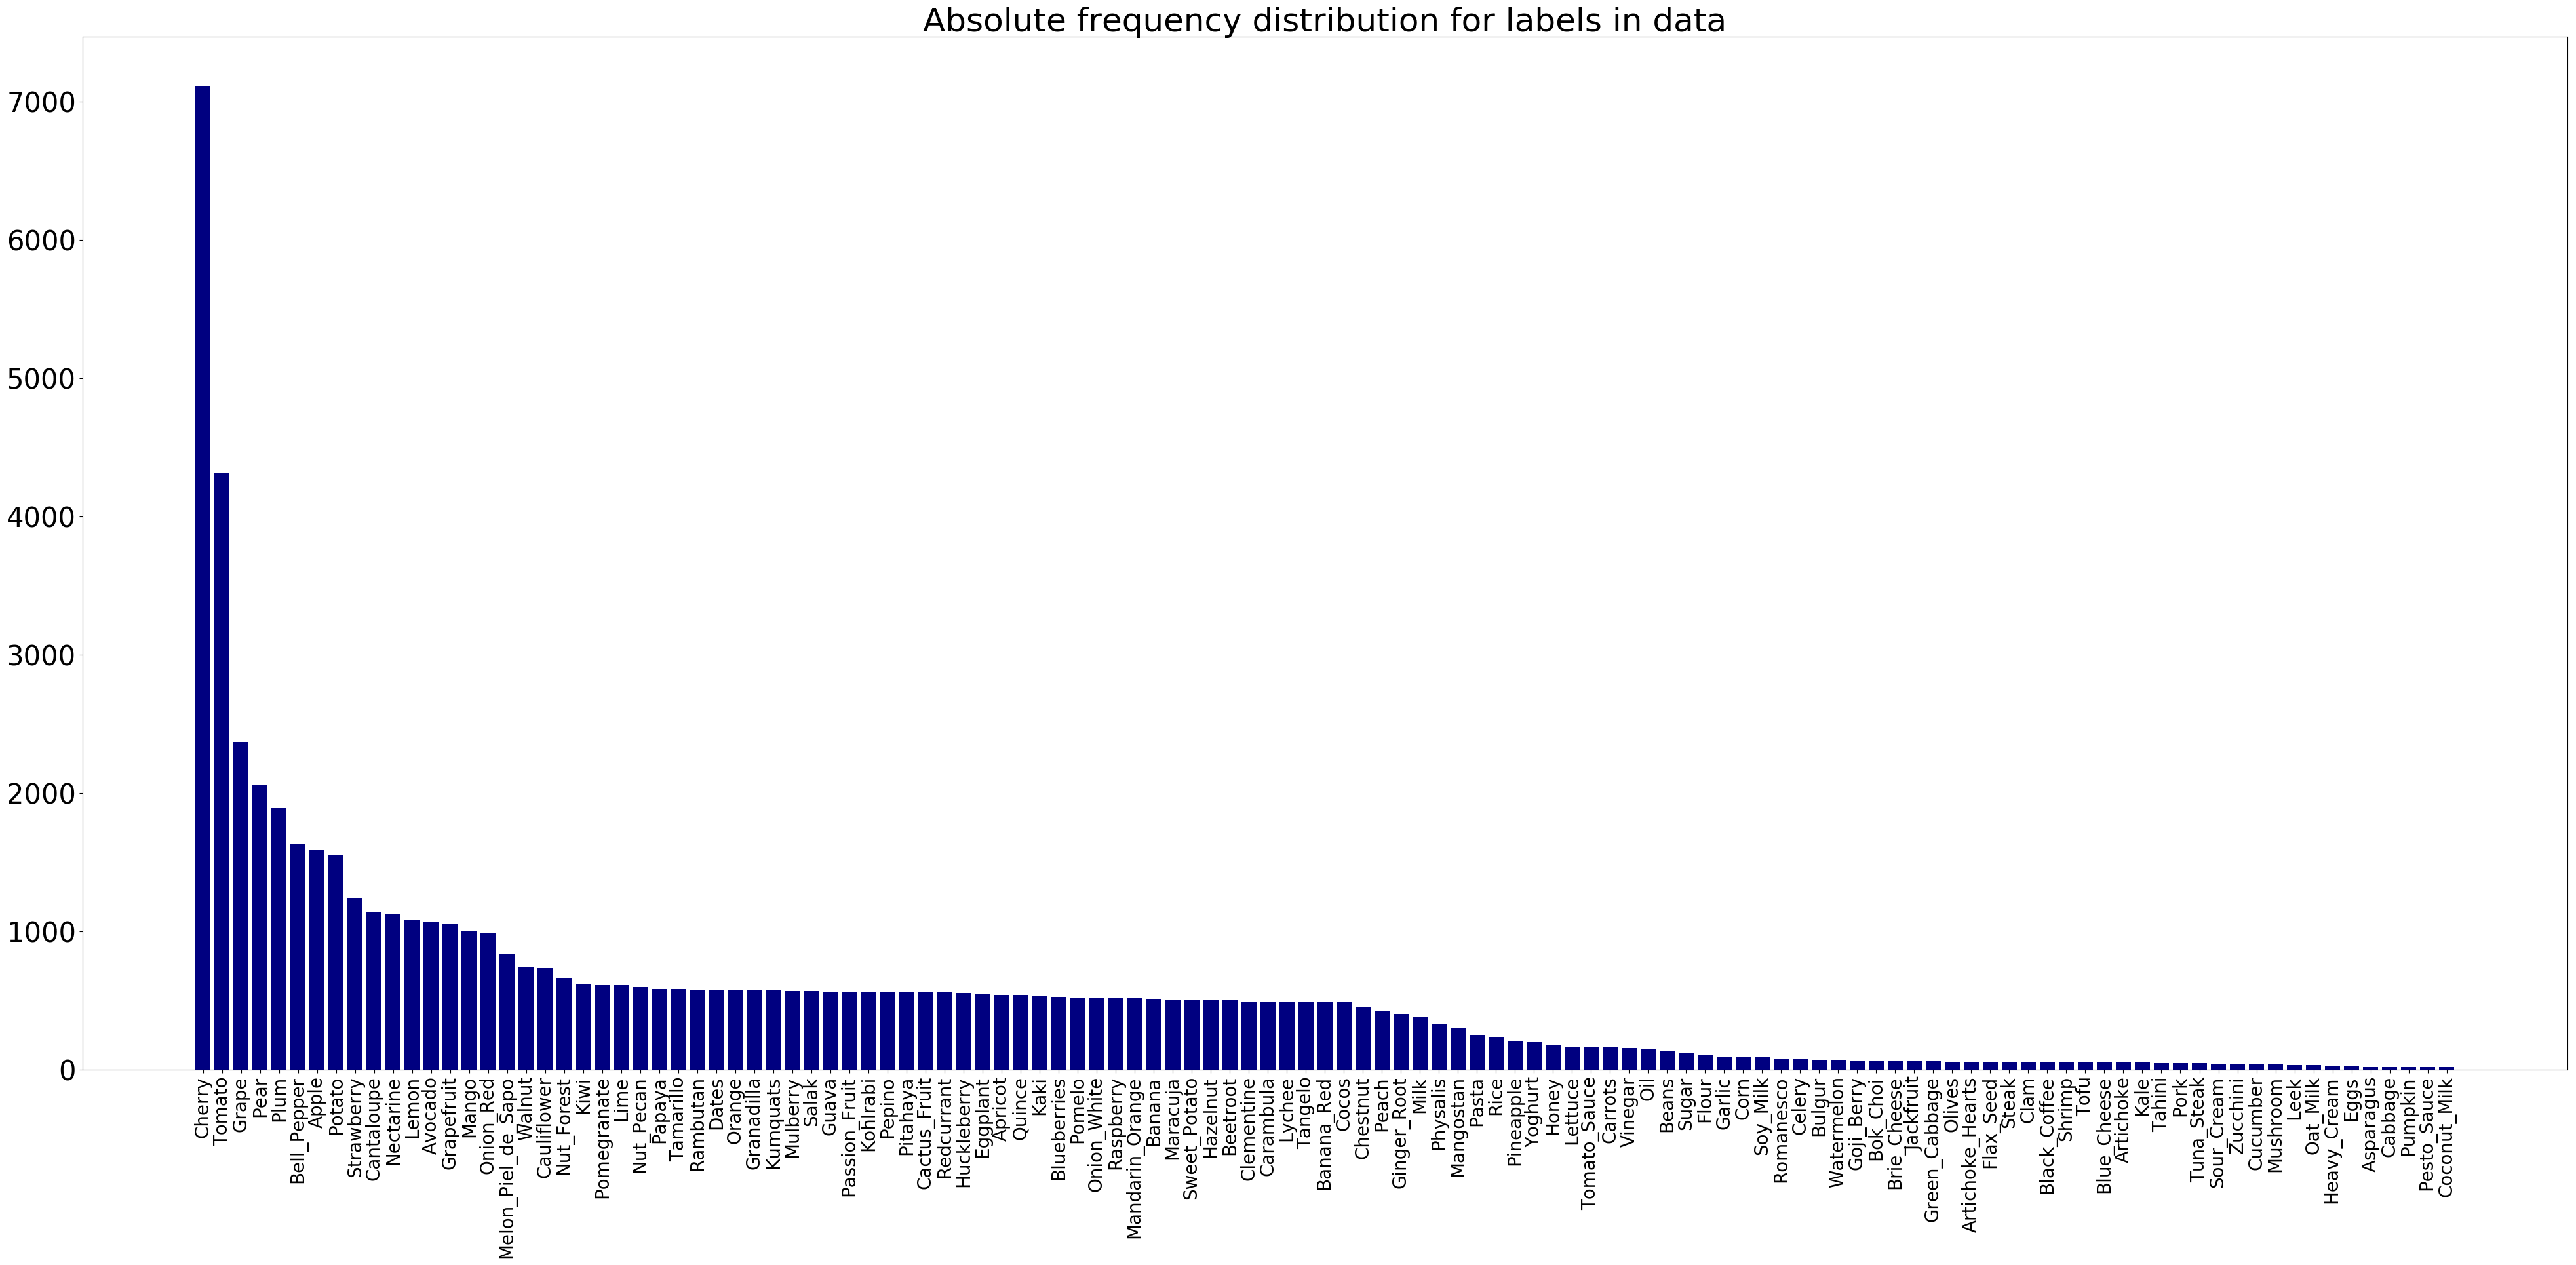

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams.update({'font.size': 30})
plt.figure(num=None, figsize=(40, 20), dpi=100, facecolor='w', edgecolor='k')
plt.bar(indices, number, color='navy')
plt.xticks(indices, label, fontsize=20, rotation='vertical')
plt.title('Absolute frequency distribution for labels in data')
plt.tight_layout()
plt.show()

fig = plt.gcf()
fig.savefig('label_freq_abs.png', dpi=100)

In [45]:
# Rename files

# for directory in os.listdir(train_dir):
#     i = 0
#     for filename in os.listdir(train_dir + '/' + directory): 
#         name = directory + '_' + str(i) + ".jpg"
#         original = train_dir + '/' + directory + '/' + filename
          
#         os.rename(original, train_dir + '/' + directory + '/' + name) 
#         i += 1

In [59]:
# Write csv file of paths
import os
import csv

path = train_dir

with open(os.path.join(base_dir, 'data/ingredients-images/train.csv'), 'w') as csvfile:
    writer = csv.writer(csvfile)
    
    for root, dirs, files in os.walk(path):
        for filename in files:
            if not dirs:
                directory = root.split('/', 6)[6]
                writer.writerow(['UNASSIGNED', 'gs://w261-251417-vcm/ingredients-train/' + directory + '/'+ filename, directory,'','','','','','','',''])

In [ ]:
# Storage bucket: w261-251417-vcm